Análise Demográfica III (DM003)
Laboratório 2: Métodos para mensuração da cobertura do registro de óbitos da mortalidade adulta

# Introdução

O estudo do nível e padrão da mortalidade e também a obtenção de estimativas confiáveis são muito importantes na compreensão da dinâmica demográfica e no planejamento fiscal e de políticas sociais, especialmente nas áreas de saúde e previdência (Agostinho, 2008). Estimar a mortalidade é um desafio, uma vez que a qualidade da informação geralmente não é satisfatória (Jorge e Gotlieb, 2000; Ministério da Saúde, 2001 apud Agostinho, 2008). As dificuldades existentes nas fontes de dados utilizadas na estimativa da mortalidade estão relacionadas à incompleta cobertura do registro de óbitos e a erros na declaração da idade, tanto no registro de óbito quanto nos dados de população (United Nations, 1983; Preston, Elo, Stewart, 1999 apud Agostinho, 2008). Para contornar esses problemas dos dados, diferentes metodologias foram desenvolvidas para se mensurar a mortalidade adulta de forma indireta (Brass, 1975; Preston et al., 1980; Bennett e Horiuchi, 1981; Hill, 1987; Hill e Choi, 2004 apud Agostinho, 2008).

O objetivo deste trabalho é mensurar a cobertura do registro de óbitos da mortalidade adulta de homens no estados do Amazonas em 2010. Considerando que temos disponibilidade de dados dos censos de 2000 e 2010, este trabalho será realizado utilizando métodos baseados em dados dois censos. Especificamente serão aplicados os métodos: (1) General Growth Balance (GGB) e (2) Synthetic Extinct Generation (SEG).

# Metodologia

Conforme colocado no trabalho de Agostinho (2008):

    "Os métodos usados na estimativa da cobertura do registro de mortes avaliam a cobertura do registro de óbitos 
    comparando a distribuição etária de mortes com a distribuição etária da população (proveniente de censos ou surveys). 
    Se a cobertura do registro de mortes relativa à cobertura do registro de pessoas pode ser estimada, 
    os dados de mortalidade podem ser ajustados por esse diferencial de cobertura e um padrão de mortalidade não viesado é 
    calculado por idades em determinado período".

Este trabalho utiliza como fontes dados informações dos Censos de 2000 e 2010, para extrair o número de homens no estado do Amazonas (AM) ([dados](https://sidra.ibge.gov.br/Tabela/200#resultado)). Adicionalmente, utiliza-se ainda como fonte de dados o Sistema de Mortalidade ([SIM](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sim/cnv/obt10AM.def)), para extração do número total de mortes para homens no período de 2000 e 2010. Importante ressaltar que neste período sabe-se que foi observado no AM um saldo migratório interestadual positivo e relevante, entratando vamos presupor que a população é fechada, por uma mera questão de simplificação da aplicação do método. Os dados que serão utilizados como insumo de entrada para os métodos estão apresentados na Tabela 1.

Após aplicação dos métodos, serão apresentados como resultados os gráficos para diagnósticos e respectivas interpretações. Serão apresentandos também análises comparativas dos resultados dos valores da probabilidade de morte (q(x)) ajustados versus observados, assim como entre os dois métodos utilizados neste trabalho.

Tabela 1. População de homens no Amazonas em 2000, 2010 segundo respectivos censos; e total de óbitos do período 2000 a 2010 segundo SIM. (Fontes: Censo 2000 e 2010; SIM)

In [3]:
# População em 2000, 2010 e óbitos em 2010 (Censo e SIM respectivamente)
dataSource = "https://raw.githubusercontent.com/cbeluzo/DM003/main/Lab2/AM-2000-2010-Censo-SIM-Masc.csv"
df = read.csv(dataSource, sep=';', header = T)

# Variáveis auxiliares
ultimaLinha = length(df$idade)
periodoTempo = 10

# Cálculo da média das mortes
df$mortes = df$mortes/periodoTempo

tab = df

# tabAux apenas para formatação da tabela
tabAux = tab
colnames(tabAux) <- c("Idade", "N(t1)", "N(t2)", "D(x)")
tabAux

Idade,N(t1),N(t2),D(x)
0 a 4 anos,195735,188167,1086.9
5 a 9 anos,187618,195995,92.5
10 a 14 anos,170928,203418,86.9
15 a 19 anos,167067,182546,263.1
20 a 24 anos,144214,170242,394.7
25 a 29 anos,116531,161273,361.6
30 a 34 anos,96706,142710,319.2
35 a 39 anos,84397,116794,307.8
40 a 44 anos,67150,98058,337.1
45 a 49 anos,52303,80209,368.8


?????
Após aplicação dos métodos, serão apresentados gráficos 
* Explique de forma sucinta o que cada método está fazendo (utilize as fórmulas como coadjuvantes nessa explicação se achar necessário).
* Faça as interpretações dos seus resultados.
* Construa e interprete também os gráficos diagnósticos.
* Compare os q(x) encontrado com o resultado da sua tábua de vida observada construída em DM002.
* Explique como você utilizaria esse resultado? O que você faz a partir disso?


# Experimentos

## Aplicação do método General Growth Balance (GGB)

O método General Growth Balance (GGB) proposto por Hill (1987) é uma generalização do método Brass Growth Balance (BGB) proposto por Brass (1975), 
e é aplicado para populações não estáveis, mas mantém os demais pressupostos. Essa generalização pode ser usada quando se tem dados sobre os números por faixa etária de dois censos e uma estimativa do número de óbitos por faixa etária entre as datas dos dois censos. Com isso, é possível estimar as taxas de crescimento específicas por idade (diferente do pressuposto de estabilidadeda, onde consideram-se taxa intrínseca de crescimento constante). O método ainda pressupõe, no entanto, que a proporção de mortes notificadas e a completude das contagens censitárias são as mesmas em todas as idades adultas e que, além disso os dados são relatados com precisão. Por fim, assume-se ainda que a população está fechada para a migração, embora o método possa ser adaptado para acomodar a migração se houver dados disponíveis (GGB, 2020) . Resumindo, no método BGB assume-se os seguintes pressupostos:

 * População estável, embora essa suposição possa ser flexibilizada;
 * Integralidade do relato de mortes é similar para todas as idades acima de uma idade mínima (geralmente 15 anos);
 * População fechada à migração, embora esta suposição também possa ser flexibilizada, se a migração líquida for pequena em relação às taxas de mortalidade, ou se são conhecidas as estimativas do número de migrantes por idade, para que possa ser incluinda nas estimativas;

já o método GGB:

 * População não estável;
 * A cobertura de cada censo é a mesma para todas as idades;
 * Demais pressupostos do BGB.
 
A Tabela 2 apresenta o resultado dos cálculos das funções utilizadas pelo método GGB. Nesta tabala foram calculados:

* N1(x+): População acumulada no início do período
* N2(x+): População acumulada no fim do período
* D(x+): Mortes acumuladas no fim do período
* N(x): ?????
* PYL(x+): Pessoas-anos vividos até idade x+ (Nx+), calcula por uma média geométrica;
* r(x+): Taxa de crescimento entre P1+ e P2+
* d(x+): Taxas específicas de mortalidade.
* d(a1): Mortalidade residual.


Tabela 2. Funções do método GGB

In [3]:
tab$pop1_a_mais = (rev(cumsum(rev(tab$pop1))))
tab$pop2_a_mais = (rev(cumsum(rev(tab$pop2))))
tab$morte_a_mais = (rev(cumsum(rev(tab$mortes))))

# Cria coluna "anivers", e atribui o valor zero para todas as linhas. 
tab$aniversario = 0

# Retira-se uma média geométrica a partir da segunda linha. A primeira linha permanece 0. 
for (i in 2:ultimaLinha) {
  popFaixaAnterior = as.numeric(tab$pop1[i-1]) 
  popFaixaAtual = as.numeric(tab$pop2[i])
  tab$aniversario[i] = round(0.2 * sqrt(popFaixaAnterior * popFaixaAtual))
}

# Pessoas-anos vividos até idade a+ (Na+). Também uma média geométrica 
tab$Lx_a_mais = round(sqrt(as.numeric(tab$pop1_a_mais) * as.numeric(tab$pop2_a_mais)))

# Taxa de crescimento entre P1+ e P2+
tab$cresc_mais = round(log(tab$pop2_a_mais/tab$pop1_a_mais)/periodoTempo, 5)

# d(a+) = Da+/Na+. Taxa específica de mortalidade.
tab$d_a_mais = round(tab$morte_a_mais/tab$Lx_a_mais, 5)

# e(a+)-r(a+), chamar d(a+).1. Esse é o residual. Mortalidade residual. 
tab$d_a_1 = round((tab$aniversario/tab$Lx_a_mais) - tab$cresc_mais, 5)

tabAux = tab
colnames(tabAux) <- c("Idade", "N(t1)", "N(t2)", "D(x)", "N1(x+)", "N2(x+)", "D(x+)", "N(x)", "PYL(x+)", "r(x+)", "d(x+)",	"d(a1)")

tabAux[c(1,5,6,7,8,9,10,11,12)]

Idade,N1(x+),N2(x+),D(x+),N(x),PYL(x+),r(x+),d(x+),d(a1)
0 a 4 anos,1416189,1753179,7604.3,0,1575701,0.02135,0.00483,-0.02135
5 a 9 anos,1220454,1565012,6517.4,39173,1382037,0.02487,0.00472,0.00347
10 a 14 anos,1032836,1369017,6424.9,39072,1189105,0.02818,0.00540,0.00468
15 a 19 anos,861908,1165599,6338.0,35328,1002317,0.03018,0.00632,0.00507
20 a 24 anos,694841,983053,6074.9,33729,826478,0.03470,0.00735,0.00611
25 a 29 anos,550627,812811,5680.2,30501,668996,0.03894,0.00849,0.00665
30 a 34 anos,434096,651538,5318.6,25792,531818,0.04061,0.01000,0.00789
35 a 39 anos,337390,508828,4999.4,21255,414335,0.04109,0.01207,0.01021
40 a 44 anos,252993,392034,4691.6,18194,314932,0.04380,0.01490,0.01397
45 a 49 anos,185843,293976,4354.5,14678,233738,0.04586,0.01863,0.01694


### 3 - Parametros para análise gráfica

In [ ]:
# Valor do fator de correção.
fatorC = (sd(tab$d_a_1[2:14]) / sd(tab$d_a_mais[2:14]))
cat("Fator de correção: ", fatorC, "\n")

# O grau de cobertura é o inverso da inclinação da reta, inverso é do fator de correção
grauCobertura = 1 / fatorC
cat("Grau de Cobertura: ", grauCobertura, "\n")

# Intercepto
intercepto = mean(tab$d_a_1[4:14]) - fatorC * mean(tab$d_a_mais[4:14])
cat("Intercepto: ", intercepto, "\n")

# Estimando o grau de cobertura da relação do 1o e 2o Censos
coberturaCensos = exp(intercepto * periodoTempo)
cat("Grau de Cobertura Intercensitário: ", coberturaCensos, "\n")


# Estimando valores de ajustes com base no intercepto e inclinação
# valores residuais
tab$ajusteV = intercepto + fatorC * tab$d_a_mais
cat("Valores Residuais: ", "\n")
tab[c(1,13)]

Fator de correção:  0.9642345 
Grau de Cobertura:  1.037092 
Intercepto:  -0.001253914 
Grau de Cobertura Intercensitário:  0.9875391 
Valores Residuais:  


idade,ajusteV
<chr>,<dbl>
0 a 4 anos,0.003403338
5 a 9 anos,0.003297272
10 a 14 anos,0.003952952
15 a 19 anos,0.004840047
20 a 24 anos,0.005833209
25 a 29 anos,0.006932436
30 a 34 anos,0.008388430
35 a 39 anos,0.010384396
40 a 44 anos,0.013113179


### 4 - Cáculo de probabilidade de morte q(x)

In [ ]:
#Taxa específica de mortalidade observada
tab$temj = tab$mortes/round(sqrt(as.numeric(tab$pop1)*as.numeric(tab$pop2)))

# Taxa específica de mortalidade ajustada 
tab$ggbadj = tab$temj/grauCobertura

# 5qa observado
tab$q_a_obs = round(tab$temj*(10/2+5*tab$temj), 5)

# 5qa ajustado GGB
tab$q_a_adj = round(tab$ggbadj*(10/2+5*tab$ggbadj), 5)

tab[c(1,14,15,16,17)]

idade,temj,ggbadj,q_a_obs,q_a_adj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0 a 4 anos,0.0056634743,0.0054609172,0.02848,0.02745
5 a 9 anos,0.0004823713,0.0004651190,0.00241,0.00233
10 a 14 anos,0.0004660342,0.0004493662,0.00233,0.00225
15 a 19 anos,0.0015065708,0.0014526876,0.00754,0.00727
20 a 24 anos,0.0025190187,0.0024289247,0.01263,0.01217
25 a 29 anos,0.0026377025,0.0025433637,0.01322,0.01275
30 a 34 anos,0.0027171276,0.0026199481,0.01362,0.01313
35 a 39 anos,0.0031002286,0.0029893473,0.01555,0.01499
40 a 44 anos,0.0041542405,0.0040056619,0.02086,0.02011


### 5 - Gráfico de diagnostico GGB


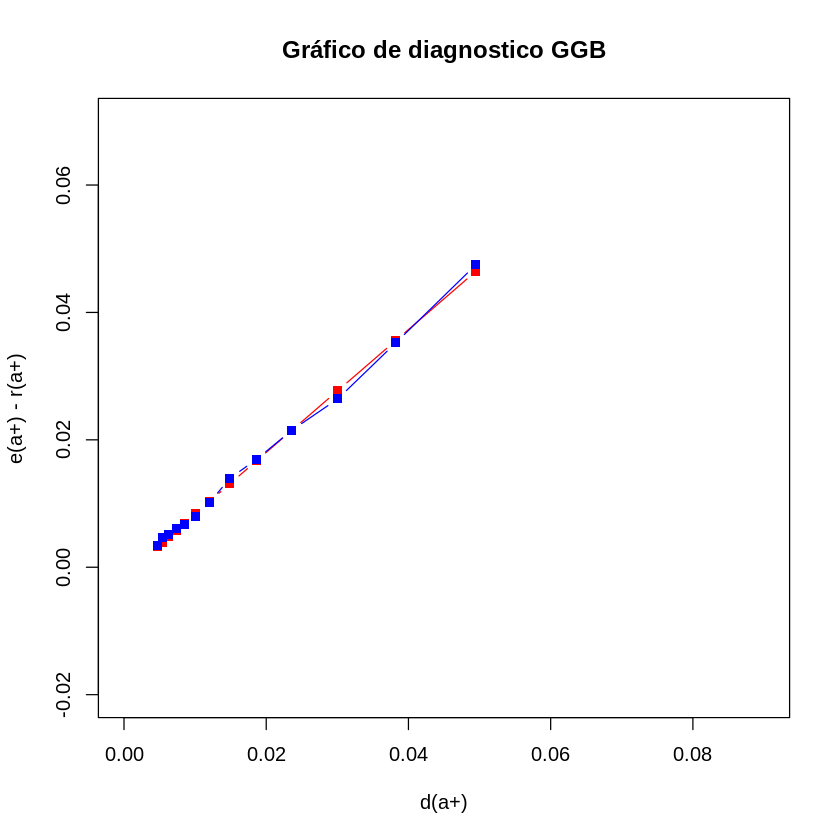

In [ ]:
plot(tab$d_a_mais[2:14], ajusteV[2:14], 
  type='b', pch=15, col='red', 
  xlim = c(0,0.09),
  ylim = c(-0.02,0.07),
  main = 'Gráfico de diagnostico GGB', xlab = 'd(a+)', ylab='e(a+) - r(a+)'
)

# Comparando os residuais com  as mortes da+
lines(tab$d_a_mais[2:14], tab$d_a_1[2:14], 
  type='b', col='blue', pch=15
)

# **3. Estimando o Bennett e Horiuchi** (Geração extinta)


In [ ]:
# Recuperando os dados originais
tab = mort_mulheres_colombia
tab

ERROR: ignored

In [ ]:
# Gerando os aniversarios na idade exata, Nx (lembrando que partimos de grupos quinquenais)
# Utilizando informação de população e grupos de idades adjacentes em dois censos.
# Retira-se uma média geométrica

# Inicializando variável aniversario
tab$aniversario = 0

# Retira-se uma média geométrica
for (i in 2:ultimaLinha) {
  popFaixaAnterior = as.numeric(tab$pop1[i-1]) 
  popFaixaAtual = as.numeric(tab$pop2[i])
  tab$aniversario[i] = round(0.2 * sqrt(popFaixaAnterior * popFaixaAtual))
}

tab

idade,pop1,ano1,pop2,ano2,mortes,aniversario
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
0-4,263616,1985,378305,1993,13423.9,0
5-9,242587,1985,371652,1993,2591.8,62601
10-14,149369,1985,274823,1993,1092.6,51640
15-19,167870,1985,274725,1993,1573.6,40514
20-24,138787,1985,225284,1993,2550.9,38894
25-29,144487,1985,223704,1993,1670.8,35240
30-34,110772,1985,172375,1993,1602.5,31563
35-39,92836,1985,161441,1993,1390.0,26746
40-44,68510,1985,108528,1993,1472.2,20075


### Inserindo funçoes na tabela

In [ ]:
# Taxa de crescimento
for (i in 1:ultimaLinha) {
  tab$cresc[i] = round(log(tab$pop2[i]/tab$pop1[i])/periodoTempo, digits=5)
}

# Taxa de crescimento acumulado, r(a-x). Fórmula para a primeira idade difernte das demais 
for (i in 1:ultimaLinha) {
  tab$cum_cresc[i] = round(0, digits=5)
}

# Para a primeira idade
tab$cum_cresc[1] = round(2.5 * tab$cresc[1], digits=5)

# Para as demais - Na idade x 2.5 e demais multiplica por 5. Por que 5?
for (i in 2:ultimaLinha) {
  tab$cum_cresc[i] = round(2.5 * tab$cresc[i] + 5 * sum(tab$cresc[(i-1):1]), digits=5)
}

# Mortes na tabela de vida - util para estimar esperan�a de vida intervalo aberto
for (i in 1:ultimaLinha) {
  tab$morte_tab[i] = round(tab$mortes[i] * exp(tab$cum_cresc[i]), digits=0)
}

tab

idade,pop1,ano1,pop2,ano2,mortes,aniversario,cresc,cum_cresc,morte_tab
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-4,263616,1985,378305,1993,13423.9,0,0.04515,0.11288,15028
5-9,242587,1985,371652,1993,2591.8,62601,0.05332,0.35905,3711
10-14,149369,1985,274823,1993,1092.6,51640,0.07621,0.68288,2163
15-19,167870,1985,274725,1993,1573.6,40514,0.06157,1.02732,4396
20-24,138787,1985,225284,1993,2550.9,38894,0.06055,1.33263,9670
25-29,144487,1985,223704,1993,1670.8,35240,0.05464,1.62060,8448
30-34,110772,1985,172375,1993,1602.5,31563,0.05527,1.89537,10665
35-39,92836,1985,161441,1993,1390.0,26746,0.06916,2.20645,12626
40-44,68510,1985,108528,1993,1472.2,20075,0.05750,2.52310,18354


In [ ]:
# Razao entre mortes de 10-40/40-60, ou 30d10/20d40. 
# Usado para estimar intervalo aberto, ou N'x em intervalo aberto
tab$razao = round(sum(tab$morte_tab[3:8])/sum(tab$morte_tab[9:12]), digits=3)

# Com base nos valores dessa raz�o, procura-se em tabua modelo a esperan�a de vida equivalente em intervalo aberto. 
# Valores sexo feminino tabua modelo Oeste. 
# Interpolacao para gerar mortes em intervalo aberto. Ver tabela em artigo Bennett and Horiuchi do artigo.
tab$aberto = round(4.88+((0.872-tab$razao[1])/(0.872-0.827)) * (5-4.88), digits=2) 

# Para homens
# aberto <- round(4.5+((0.725-razao[1])/(0.725-0.689)) * (4.61-4.5), digits=2).

# População N'x para ultimo grupo da tabua
tab$pop_a = 0

# D*(exp(e(x)+*r+)-(e(x)+*r+)^2/6)
tab$pop_a[ultimaLinha] = round(tab$mortes[ultimaLinha] * (exp(tab$aberto[ultimaLinha] * tab$cresc[ultimaLinha]) - 
  ((tab$aberto[ultimaLinha]*tab$cresc[ultimaLinha])^2/6)), digits=0)

# População para os demais, 75-79, 70-74...0-4
# Nx+5*exp(5*r)+Dx*exp(2,5*r)
for (i in ultimaLinha:1) {
  tab$pop_a[i-1] = round(tab$pop_a[i] * exp(5*tab$cresc[i-1]) +
    tab$mortes[i-1] * exp(2.5 * tab$cresc[i-1]), digits=0)}

# Grau de cobertura para cada idade
# N'x (pop_a)/Nx (aniversários na idade)
tab$Cx = round(tab$pop_a/tab$aniversario, digits=2)

tab

idade,pop1,ano1,pop2,ano2,mortes,aniversario,cresc,cum_cresc,morte_tab,razao,aberto,pop_a,Cx
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-4,263616,1985,378305,1993,13423.9,0,0.04515,0.11288,15028,0.562,5.71,615650,Inf
5-9,242587,1985,371652,1993,2591.8,62601,0.05332,0.35905,3711,0.562,5.71,479247,7.66
10-14,149369,1985,274823,1993,1092.6,51640,0.07621,0.68288,2163,0.562,5.71,364825,7.06
15-19,167870,1985,274725,1993,1573.6,40514,0.06157,1.02732,4396,0.562,5.71,248325,6.13
20-24,138787,1985,225284,1993,2550.9,38894,0.06055,1.33263,9670,0.562,5.71,181176,4.66
25-29,144487,1985,223704,1993,1670.8,35240,0.05464,1.62060,8448,0.562,5.71,131657,3.74
30-34,110772,1985,172375,1993,1602.5,31563,0.05527,1.89537,10665,0.562,5.71,98726,3.13
35-39,92836,1985,161441,1993,1390.0,26746,0.06916,2.20645,12626,0.562,5.71,73493,2.75
40-44,68510,1985,108528,1993,1472.2,20075,0.05750,2.52310,18354,0.562,5.71,50838,2.53


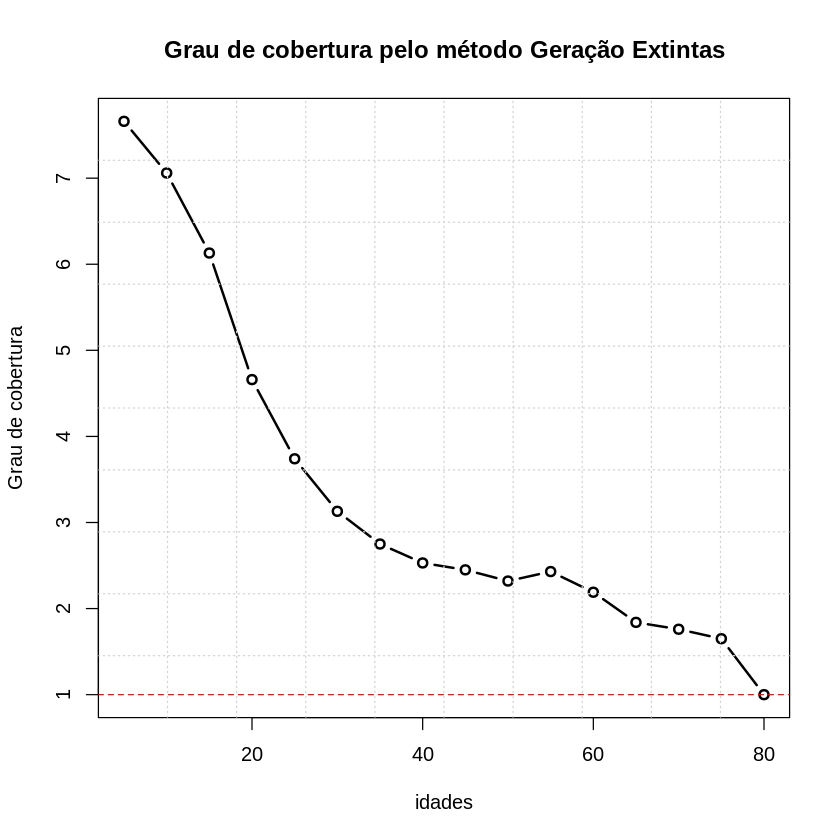

In [ ]:
# Seleção de idades através de gráfico
#windows(height=10,width=10)
plot(seq(5,80,5),tab$Cx[2:17], type='b', lwd=2, 
     main='Grau de cobertura pelo método Geração Extintas',
     xlab='idades', ylab='Grau de cobertura')

abline(h=1,lty=2, col='red')

grid(10,10)


In [ ]:
## Dos 30 aos 69 anos
grauDeCobertura = round(mean(tab$Cx[6:14]), 2)
grauDeCobertura # Grau de cobertura 2.59?


[1] 2.6

**Cálculo dos qxs**

In [ ]:
# Fator de correção
fatorC=1/mean(tab$Cx[6:14])
fatorC

#Taxa específica de mortalidade observada

tab$temj<-tab$mortes/round(sqrt(as.numeric(tab$pop1)*as.numeric(tab$pop2)))
tab$temj

# Taxa específica de mortalidade ajustada 

tab$bhadj<-tab$temj/mean(tab$Cx[6:14]) #isso pode mudar. O gráfico acima ajuda na melhor definição dos pontos. Mais estável.
tab$bhadj

#outra opção

tab$bhadj<-tab$temj*1/mean(tab$Cx[6:14]) #6:14 isso pode mudar. O gráfico acima ajuda na melhor definição dos pontos. Mais estável.
tab$bhadj

# 5qa observado

tab$q.a.obs<-round(tab$temj*10/(2+5*tab$temj), digits=5)
tab$q.a.obs

# 5qa ajustado SEG

tab$q.a.adj<-round(tab$bhadj*10/(2+5*tab$bhadj), digits=5)
tab$q.a.adj



[1] 0.3849444

[1] 0.042508138 0.008631766 0.005392679 0.007327556 0.014426291 0.009293374
 [7] 0.011597024 0.011353983 0.017073340 0.017585462 0.024858507 0.022174942
[13] 0.039850407 0.038948835 0.057006774 0.065136612 0.127106521

[1] 0.016363270 0.003322750 0.002075882 0.002820702 0.005553320 0.003577432
 [7] 0.004464209 0.004370652 0.006572287 0.006769425 0.009569143 0.008536120
[13] 0.015340191 0.014993136 0.021944438 0.025073974 0.048928943

[1] 0.016363270 0.003322750 0.002075882 0.002820702 0.005553320 0.003577432
 [7] 0.004464209 0.004370652 0.006572287 0.006769425 0.009569143 0.008536120
[13] 0.015340191 0.014993136 0.021944438 0.025073974 0.048928943

[1] 0.19212 0.04225 0.02660 0.03598 0.06962 0.04541 0.05635 0.05520 0.08187
[10] 0.08422 0.11702 0.10505 0.18120 0.17746 0.24948 0.28008 0.48228

[1] 0.07860 0.01648 0.01033 0.01400 0.02739 0.01773 0.02207 0.02162 0.03233
[10] 0.03328 0.04673 0.04179 0.07387 0.07226 0.10402 0.11797 0.21798

# **4. Kenneth Hill 2001 (Geração extinta ajustado)** - Método Híbrido (SEG ajustado)


In [ ]:
tab = mort_mulheres_colombia

# Fazendo o ajuste pela relação de cobertura entre os censos
# Valor estimado pelo GGB - ver aula passada. 0.77 é a variação de cobertura entre censos.
# Com base nas informações dos grupos de idade de 15 a 65+
# ajustando a primeira população pelo cobertura entre censos

cobertura.censos = 0.77 # Valor estimado pelo GGB

tab$pop1 = tab$pop1/cobertura.censos

# Cálculo do Período de tempo
extensaoPeriodo<-tab$ano2[1]-tab$ano1[1]

## Gerando os aniversarios na idade exata, Nx (lembrando que partimos de grupos quinquenais)
## Utilizando informação de população e grupos de idades adjacentes em dois censos.
## Retira-se uma média geométrica
tab$aniversario = 0
for (i in 2:ultimaLinha) {
  tab$aniversario[i] = round(0.2 * sqrt(as.numeric(tab$pop1[i-1]) * as.numeric(tab$pop2[i])))
}

## Taxa de crescimento
for (i in 1:ultimaLinha) {
  tab$cresc[i] = round(log(tab$pop2[i]/tab$pop1[i])/extensaoPeriodo, digits=5)}

# Taxa de crescimento acumulado, r(a-x) 
tab$cum_cresc = 0
# Para a primeira idade
tab$cum_cresc[1] = round(2.5 * tab$cresc[1], 5)
# Para as demais - Na idade x 2.5 e demais multiplica por 5. Por que 5?
for (i in 2:ultimaLinha) {
  tab$cum_cresc[i] = round(2.5 * tab$cresc[i] + 
    5 * sum(tab$cresc[(i-1):1]), digits=5)
}

# Mortes na tabela de vida
for (i in 1:ultimaLinha) {
  tab$morte_tab[i] = round(tab$mortes[i] * exp(tab$cum_cresc[i]), digits=0)
}

# Razao entre mortes de 10-40/40-60, ou 30d10/20d40. 
# Usado para estimar intervalo aberto, ou N'x em intervalo aberto
tab$razao = round(sum(tab$morte_tab[3:8])/sum(tab$morte_tab[9:12]), digits=3)

# valores sexo feminino tabua modelo Oeste. 
# Interpolacao para gerar mortes em intervalo aberto.
# Ver tabela em artigo
tab$aberto = round(4.88 + ((0.872 - tab$razao[1])/(0.872 - 0.827)) * (5 - 4.88), digits=2) 
# Para homens
# aberto<-round(4.5+((0.725-razao[1])/(0.725-0.689))*(4.61-4.5), digits=2)

# População N'a para ultimo grupo da tabua
tab$pop_a = 0
# D*(exp(e(x)+*r+)-(e(x)+*r+)^2/6)
tab$pop_a[ultimaLinha] = round(tab$mortes[ultimaLinha] * 
  (exp(tab$aberto[ultimaLinha] * tab$cresc[ultimaLinha]) - ((tab$aberto[ultimaLinha] * tab$cresc[ultimaLinha])^2/6))
  , digits=0)

## População para os demais 
for (i in length(tab$idade):1) {
  tab$pop_a[i-1] = round(tab$pop_a[i] * exp(5 * tab$cresc[i-1]) +
  tab$mortes[i-1] * exp(2.5 * tab$cresc[i-1]), digits=0)
}

### Grau de cobertura para cada idade
tab$Cx = round(tab$pop_a/tab$aniversario, digits=2)

tab

idade,pop1,ano1,pop2,ano2,mortes,aniversario,cresc,cum_cresc,morte_tab,razao,aberto,pop_a,Cx
<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0-4,342358.44,1985,378305,1993,13423.9,0,0.01248,0.03120,13849,1.16,4.11,90037,Inf
5-9,315048.05,1985,371652,1993,2591.8,71341,0.02065,0.11402,2905,1.16,4.11,71579,1.00
10-14,193985.71,1985,274823,1993,1092.6,58850,0.04354,0.27450,1438,1.16,4.11,62096,1.06
15-19,218012.99,1985,274725,1993,1573.6,46170,0.02890,0.45560,2482,1.16,4.11,48968,1.06
20-24,180242.86,1985,225284,1993,2550.9,44324,0.02788,0.59755,4637,1.16,4.11,40916,0.92
25-29,187645.45,1985,223704,1993,1670.8,40160,0.02197,0.72218,3440,1.16,4.11,33213,0.83
30-34,143859.74,1985,172375,1993,1602.5,35970,0.02260,0.83360,3688,1.16,4.11,28176,0.78
35-39,120566.23,1985,161441,1993,1390.0,30479,0.03649,0.98133,3709,1.16,4.11,23651,0.78
40-44,88974.03,1985,108528,1993,1472.2,22878,0.02483,1.13463,4579,1.16,4.11,18438,0.81


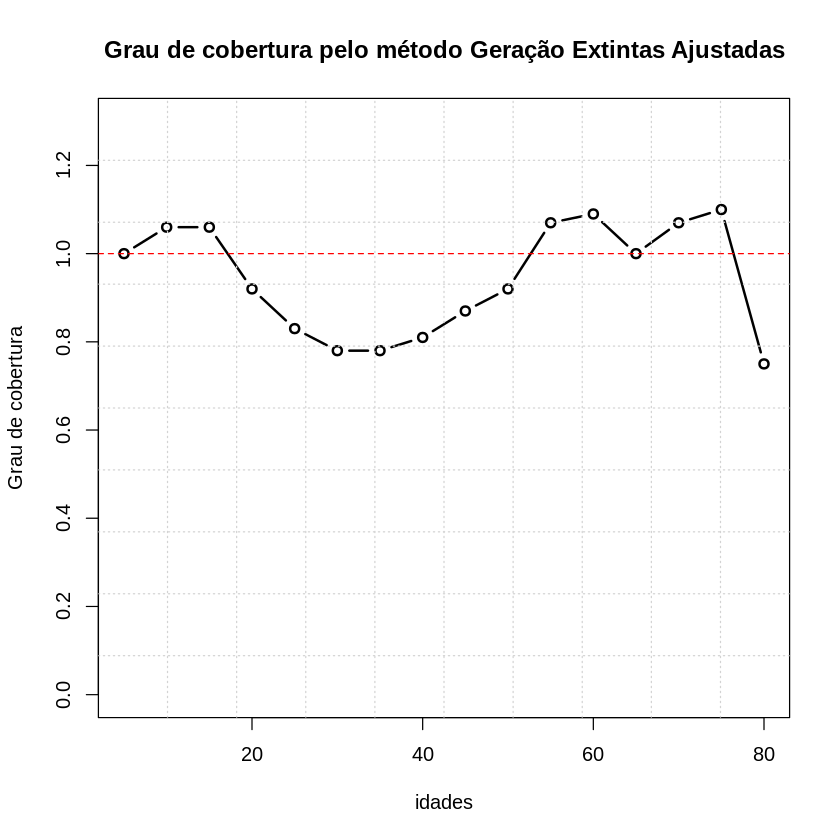

In [ ]:
# Seleção de idades através de gráfico
# windows(height= 10,width=10)
plot(seq(5,80,5),tab$Cx[2:17], type='b', lwd=2, ylim=c(0,1.3), 
     main='Grau de cobertura pelo método Geração Extintas Ajustadas',
     xlab='idades', ylab='Grau de cobertura')

abline(h=1, lty=2, col='red')

grid(10,10)

In [ ]:
# Dos 30 aos 69 anos
grauDeCobertura = mean(tab$Cx[6:14])
grauDeCobertura
# Grau de cobertura 0.92. Melhorou em relação ao anterior?
# Depois ajusta a taxa ou obitos
# taxa vezes grau de cobertura ou dividida pelo fator de correção

[1] 0.9055556

**CÁLCULO DOS qxs**


In [ ]:
# Fator de correção
fatorC=1/mean(tab$Cx[6:14])
fatorC

#Taxa específica de mortalidade observada

tab$temj<-tab$mortes/round(sqrt(as.numeric(tab$pop1)*as.numeric(tab$pop2)))
tab$temj

# Taxa específica de mortalidade ajustada 

tab$ggbbhadj<-tab$temj/mean(tab$Cx[6:14]) #isso pode mudar. O gráfico acima ajuda na melhor definição dos pontos. Mais estável.
tab$ggbbhadj

#outra opção

tab$ggbbhadj<-tab$temj*1/mean(tab$Cx[6:14]) #6:14 isso pode mudar. O gráfico acima ajuda na melhor definição dos pontos. Mais estável.
tab$ggbbhadj

# 5qa observado

tab$q.a.obs<-round(tab$temj*10/(2+5*tab$temj), digits=5)
tab$q.a.obs

# 5qa ajustado SEG

tab$q.a.adj<-round(tab$ggbbhadj*10/(2+5*tab$ggbbhadj), digits=5)
tab$q.a.adj



[1] 1.104294

[1] 0.037300734 0.007574332 0.004732062 0.006429891 0.012658988 0.008154898
 [7] 0.010176348 0.009963086 0.014981784 0.015431268 0.021813123 0.019458457
[13] 0.034968882 0.034176699 0.050022290 0.057155751 0.111537054

[1] 0.041190994 0.008364293 0.005225590 0.007100493 0.013979250 0.009005409
 [7] 0.011237685 0.011002181 0.016544302 0.017040664 0.024088111 0.021487867
[13] 0.038615943 0.037741140 0.055239339 0.063116780 0.123169753

[1] 0.041190994 0.008364293 0.005225590 0.007100493 0.013979250 0.009005409
 [7] 0.011237685 0.011002181 0.016544302 0.017040664 0.024088111 0.021487867
[13] 0.038615943 0.037741140 0.055239339 0.063116780 0.123169753

[1] 0.17060 0.03717 0.02338 0.03164 0.06135 0.03996 0.04962 0.04860 0.07220
[10] 0.07429 0.10343 0.09278 0.16079 0.15743 0.22231 0.25005 0.43609

[1] 0.18673 0.04096 0.02579 0.03488 0.06754 0.04404 0.05465 0.05354 0.07944
[10] 0.08172 0.11360 0.10196 0.17608 0.17244 0.24268 0.27257 0.47086

# **5. DDM**


In [ ]:
install.packages('DDM', repos='http://cran.rstudio.com/')
library(DDM)
packageVersion('DDM')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] ‘1.0.0’

In [ ]:
# Mostra primeiras linhas do datafrane
head(BrasilMales)

,cod,pop1,pop2,deaths,year1,year2,age,sex
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>
1,11,10026,15841,538.5,1980,1991,0,m
2,11,33801,63170,156.5,1980,1991,1,m
3,11,37658,79026,42.0,1980,1991,5,m
4,11,33235,75034,42.0,1980,1991,10,m
5,11,28180,63671,88.0,1980,1991,15,m
6,11,24429,56590,121.0,1980,1991,20,m


In [ ]:
# Pop AM Censo 1980 e 1991
dfAmazonas = subset(BrasilMales, cod == 13)
dfAmazonas

,cod,pop1,pop2,deaths,year1,year2,age,sex
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>
37,13,29328,27859,991.0,1980,1991,0,m
38,13,105112,123959,211.0,1980,1991,1,m
39,13,111384,162301,71.5,1980,1991,5,m
40,13,94045,151331,66.5,1980,1991,10,m
41,13,79099,120413,152.0,1980,1991,15,m
42,13,64665,97192,188.0,1980,1991,20,m
43,13,51902,82068,166.0,1980,1991,25,m
44,13,40637,70707,136.5,1980,1991,30,m
45,13,32885,55916,133.0,1980,1991,35,m


In [ ]:
ggb(dfAmazonas)

,cod,coverage,lower,upper,a,b,delta,k1,k2
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
13,13,0.6429759,15,60,-0.001894557,1.555268,0.9793755,0.9793755,1


In [ ]:
ddm(dfAmazonas)

cod,ggb,seg,ggbseg,lower,upper,delta
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
13,0.6429759,0.7228057,0.6687365,15,60,0.9793755


# General Growth Balance de Brass
[GGB Brass](http://demographicestimation.iussp.org/print/book/export/html/83)

O método General Growth Balance de Brass ( Brass, 1975 ) é o primeiro do que mais tarde ficou conhecido como Métodos de distribuição de mortes para estimar a integridade do registro de mortes em relação a uma estimativa da população. O método faz uso da observação de que em uma população estável (ou seja, uma população com uma estrutura etária imutável ao longo do tempo - pelo menos para a idade adulta - crescendo a uma taxa constante, r , a cada ano) que está fechada para a migração e tem dados relatados, a taxa de crescimento, r , é igual à taxa de natalidade, b , menos a taxa de mortalidade, d . Uma relação semelhante é válida para a população com idade x e mais velhos, ou seja, que

r = b(x+) − d(x+)

onde a taxa de "natalidade" parcial, b(x+), definido como a taxa na qual as pessoas atingem a idade x na população com idade x e mais velhos e a taxa parcial de mortalidade d(x+) é a taxa de mortalidade de pessoas com idade x e mais velhos. 

Se, nesta população, as mortes são subnotificadas na mesma medida em cada idade, então

b(x+) = r + (dr(x+) / c)

onde dr(x+) é a taxa de mortalidade com base nas mortes registradas para as idades x e mais velhas e "c" é a proporção de mortes que são relatadas. 

Pode-se estimar c a partir da inclinação de uma reta ajustada aos pontos de dados  b(x+), dr(x+) .

Essa estimativa geralmente se limita à idade dos adultos, uma vez que a (extensão da) abrangência da notificação de mortes de crianças geralmente difere daquela das mortes de adultos. As taxas de mortalidade podem ser estimadas dividindo o número de mortes relatadas em cada grupo de idade por "c" e dividindo esses números por uma estimativa da população exposta ao risco com base na população usada para estimar as taxas parciais de natalidade e mortalidade.

O método é um caso particular do método mais geral de  Generalized Growth Balance, que requer estimativas da população em dois pontos no tempo, mas não requer que a população seja estável. Os leitores são encaminhados para essa seção para obter mais detalhes sobre o método. Ele está incluído neste manual como um método que pode ser considerado quando se tem uma estimativa dos números da população apenas em um ponto no tempo.

# Referências

AGOSTINHO, Cíntia & Queiroz, Bernardo. (2008) Estimativas da mortalidade adulta para o Brasil no período 1980/2000: uma abordagem metodológica comparativa.

JORGE, M.H.P. M. e GOTLIEB, S.L.D. (2000) As Condições de Saúde no Brasil: Retrospecto de 1979 a 1995. Rio de Janeiro: Editora FIOCRUZ.

MINISTÉRIO DA SAÚDE (2001) Anuário Estatístico de Saúde do Brasil, 2001. Disponível online em http://portal.saude.gov.br/portal/aplicacoes/anuario2001/index.cfm. Acessado em 14/02/2008.

UN Population Division. (1983) Manual X: Indirect Techniques for Demographic Estimation. New York: United Nations, Department of Economic and Social Affairs, ST/ESA/SER.A/81. http://www.un.org/esa/population/techcoop/DemEst/manual10/manual10.html

UN Population Division. (2002) Methods for Estimating Adult Mortality. New York: United Nations, Department of Economic and Social Affairs, ESA/P/WP.175. http://www.un.org/esa/population/techcoop/DemEst/methods_adultmort/methods_adultmort.html

PRESTON, S. H.; ELO, I. T.; STEWART, Q. (1999) Effects of age misreporting on mortality estimates at older ages. Population Studies, v.53, n.2, p. 165-177
Brass W. 1975. Methods for Estimating Fertility and Mortality from Limited and Defective Data. Chapel Hill NC: Carolina Population Centre.

PRESTON, S., COALE, A.J., TRUSSELL, J., MAXINE, W. (1980) Estimating the completeness of reporting of adult deaths in populations that are approximately stable. Population Studies, vol. 46, n. 2, summer, 1980, pg. 179-202.

BENNETT, N. G.; HORIUCHI, S. (1981) Estimating the completeness of death registration in a closed population. Population Index, vol.47, n.2, p. 207-221

HILL K. (1987) "Estimating census and death registration completeness", Asian and Pacific Census Forum 1(3):8-13, 23-24. http://hdl.handle.net/10125/3602.

HILL,K.eCHOI,Y. (2004) Death distribution methods for estimating adult mortality: sensitivity analysis with simulated data errors. Adult mortality in developing countries workshop. The Marconi Center, Marin County, California, July 2004. 

GGB. (2020) The Generalized Growth Balance Method. Disponível em http://demographicestimation.iussp.org/content/generalized-growth-balance-method2020.

TESE AGOSTINHO...
